In [7]:
from linmix import linmix as linmix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ks_2samp
import random

from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices

xsig = [0.2] * 99
ysig = [0.2] * 99

log_flux_barenfeld_0_88mm_updated = [np.log10(x) for x in flux_barenfeld_0_88mm_updated]
log_ricci_taurus_fluxes_1mm = [np.log10(x) for x in ricci_taurus_fluxes_1mm]
log_flux_list_ophiucus_ricci_1mm = [np.log10(x) for x in flux_list_ophiucus_ricci_1mm]
log_flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]

In [8]:
class region_data():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

lupus_data = region_data()
taurus_data = region_data()
ophiucus_data = region_data()
upper_sco_data = region_data()
total_sample_data = region_data()

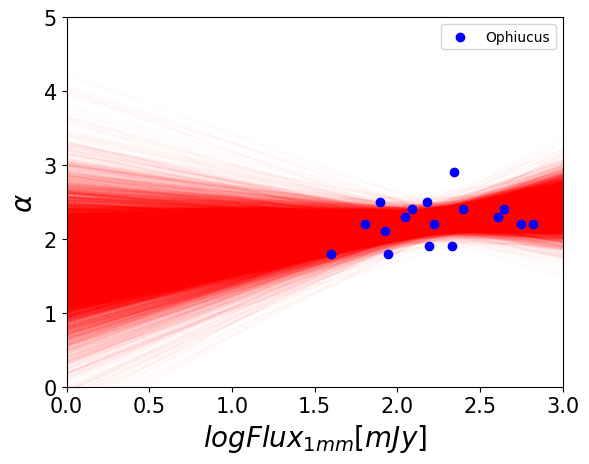

In [79]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:len(flux_list_ophiucus_ricci_1mm)], ysig[:len(flux_list_ophiucus_ricci_1mm)], K=2)
lm.run_mcmc(silent=True)

ophiucus_slope_flux_alpha = []
ophiucus_y_intercept_flux_alpha = []
ophiucus_scatter = []

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    ophiucus_slope_flux_alpha.append(lm.chain[i]['beta'])
    ophiucus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ophiucus_scatter.append(lm.chain[i]['sigsqr'])

if __name__ == '__main__':
    plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='b', zorder=1)
    plt.errorbar(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, yerr=ysig[:len(flux_list_ophiucus_ricci_1mm)], ls='none', zorder=1)


    plt.xlabel('$log Flux_{1mm}[mJy]$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
    plt.legend()
    plt.xlim(0,3)
    plt.ylim(0,5)
    ax.tick_params(which='both', labelsize=15)

    plt.show()

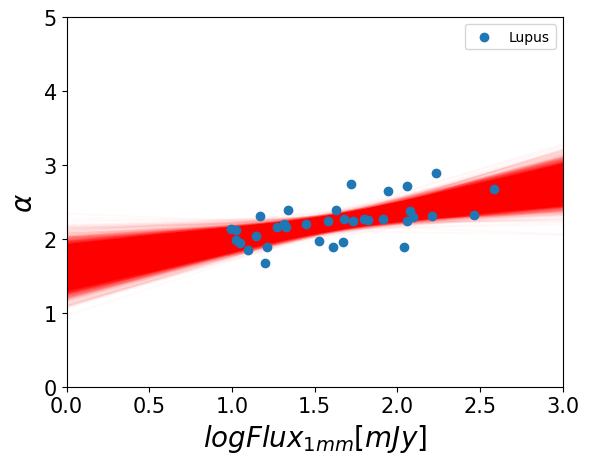

In [81]:
fig, ax = plt.subplots()

flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]
lm = linmix.LinMix(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, xsig[:len(flux_lupus_1_mm)], ysig[:len(flux_lupus_1_mm)], K=2)
lm.run_mcmc(silent=True)

lupus_slope_flux_alpha = []
lupus_y_intercept_flux_alpha = []
lupus_scatter = []

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    lupus_slope_flux_alpha.append(lm.chain[i]['beta'])
    lupus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    lupus_scatter.append(lm.chain[i]['sigsqr'])

if __name__ == '__main__':
    plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', zorder=1)

    plt.xlabel('$log Flux_{1mm}[mJy]$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
    plt.legend()
    plt.xlim(0,3)
    plt.ylim(0,5)

    ax.tick_params(which='both', labelsize=15)
    plt.show()

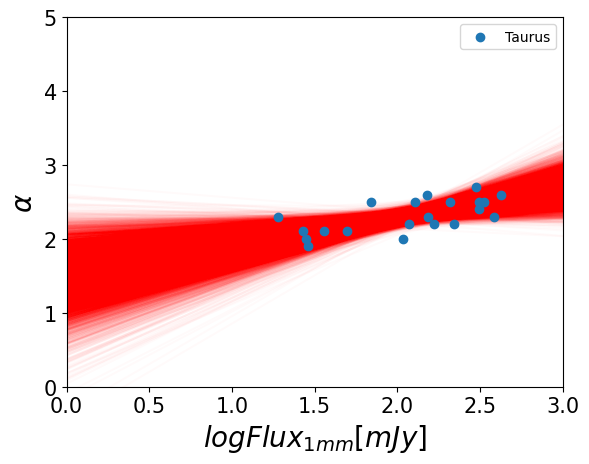

In [11]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, xsig[:len(ricci_taurus_fluxes_1mm)], ysig[:len(ricci_taurus_fluxes_1mm)], K=2)
lm.run_mcmc(silent=True)

taurus_slope_flux_alpha = []
taurus_y_intercept_flux_alpha = []
taurus_scatter =[]

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    taurus_slope_flux_alpha.append(lm.chain[i]['beta'])
    taurus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    taurus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', zorder=1)

plt.xlabel('$log Flux_{1mm}[mJy]$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
if __name__ == '__main__':
    plt.show()

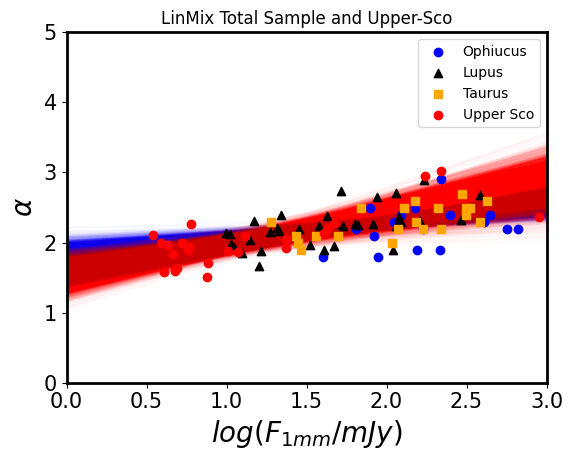

In [12]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

log_total_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_lupus_1_mm + log_flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(log_total_fluxes, total_spectra_indices, xsig[:len(log_total_fluxes)], ysig[:len(log_total_fluxes)], K=2)
lm.run_mcmc(silent=True)

total_sample_slope_flux_alpha = []
total_sample_y_intercept_flux_alpha = []
scatter_total_sample = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    total_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    total_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='b', alpha=0.02, zorder=0)
    scatter_total_sample.append(lm.chain[i]['sigsqr'])


lm = linmix.LinMix(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)

upper_sco_slope_flux_alpha = []
upper_sco_y_intercept_flux_alpha = []
scatter_upper_sco = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    upper_sco_slope_flux_alpha.append(lm.chain[i]['beta'])
    upper_sco_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_upper_sco.append(lm.chain[i]['sigsqr'])


plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue', zorder=1)
plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black', zorder=1)
plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange', zorder=1)
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red', zorder=1)

plt.xlabel('$log(F_{1mm}/mJy)$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xlim(0,3)
plt.ylim(0,5)
plt.legend()
ax.tick_params(which='both', labelsize=15)
plt.savefig("LinMix Total Sample and Upper-Sco")
plt.title("LinMix Total Sample and Upper-Sco")
plt.show()

(0.0, 4.0)

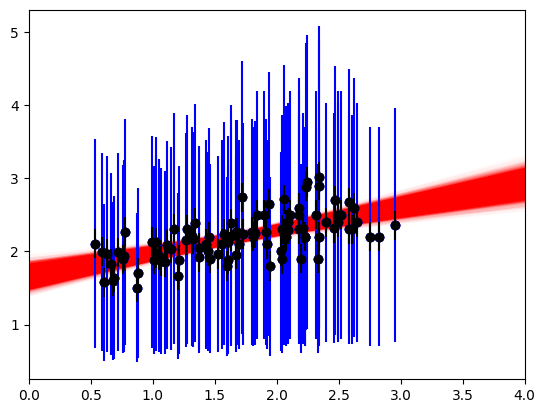

In [13]:
log_all_fluxes = log_flux_barenfeld_0_88mm_updated + log_flux_lupus_1_mm + log_ricci_taurus_fluxes_1mm + log_flux_list_ophiucus_ricci_1mm
all_spectral_indices = spectral_index_upper_sco + tazzari_lupus_spectral_indices + spectral_indices_taurus + spectral_index_ophiucus

lm = linmix.LinMix(log_all_fluxes, all_spectral_indices, xsig[:len(log_all_fluxes)], ysig[:len(all_spectral_indices)], K=2)
lm.run_mcmc(silent=True)

all_sample_slope_flux_alpha = []
all_sample_y_intercept_flux_alpha = []
scatter_all_sample = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    all_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    all_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_all_sample.append(lm.chain[i]['sigsqr'])

plt.scatter(log_all_fluxes, all_spectral_indices, label='All', color='blue', zorder=1)
plt.errorbar(log_all_fluxes, all_spectral_indices, yerr=[0.68*x for x in all_spectral_indices], fmt='o', color='blue', zorder=1)
plt.errorbar(log_all_fluxes, all_spectral_indices, yerr=[0.2], fmt='o', color='black', zorder=2)
plt.xlim(0,4)

In [14]:
chi_sum_all_sample = []
chi_sublist_all_sample = []
for i in range(len(all_sample_slope_flux_alpha)):
    chi = []
    for x in range(len(all_spectral_indices)):
        chi.append(((all_spectral_indices[x] - (all_sample_slope_flux_alpha[i] * log_all_fluxes[x] + all_sample_y_intercept_flux_alpha[i]))**2)/(scatter_all_sample[i]))

    chi_sublist_all_sample.append([chi])
    chi_sum_all_sample.append(sum(chi))

print(min(chi_sum_all_sample))
print(len(log_all_fluxes))
print(all_sample_slope_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))], all_sample_y_intercept_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))])
lowest_chi_slope_all_sample = all_sample_slope_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))]
lowest_chi_y_intercept_all_sample = all_sample_y_intercept_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))]

47.715691168164845
97
0.3379592147157358 1.6709786662887827


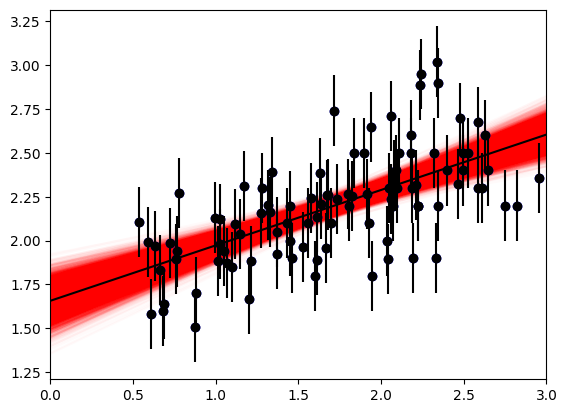

In [15]:
log_all_fluxes = log_flux_barenfeld_0_88mm_updated + log_flux_lupus_1_mm + log_ricci_taurus_fluxes_1mm + log_flux_list_ophiucus_ricci_1mm
all_spectral_indices = spectral_index_upper_sco + tazzari_lupus_spectral_indices + spectral_indices_taurus + spectral_index_ophiucus

lm = linmix.LinMix(log_all_fluxes, all_spectral_indices, xsig[:len(log_all_fluxes)], ysig[:len(all_spectral_indices)], K=2)
lm.run_mcmc(silent=True)

all_sample_slope_flux_alpha = []
all_sample_y_intercept_flux_alpha = []
scatter_all_sample = []

xs = np.arange(0, 4)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    all_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    all_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_all_sample.append(lm.chain[i]['sigsqr'])

plt.scatter(log_all_fluxes, all_spectral_indices, label='All', color='blue', zorder=1)
#plt.errorbar(log_all_fluxes, all_spectral_indices, yerr=[0.68*x for x in all_spectral_indices], fmt='o', color='blue', zorder=1)
plt.errorbar(log_all_fluxes, all_spectral_indices, yerr=[0.2], fmt='o', color='black', zorder=2)
plt.xlim(0,3)

polyfit_all_sample = np.polyfit(log_all_fluxes, all_spectral_indices, 1)
plt.plot(xs, polyfit_all_sample[0] * xs + polyfit_all_sample[1], color='black', zorder=1)

In [16]:
chi_sum_all_sample = []
chi_sublist_all_sample = []
for i in range(len(all_sample_slope_flux_alpha)):
    chi = []
    for x in range(len(all_spectral_indices)):
        chi.append(((all_spectral_indices[x] - (all_sample_slope_flux_alpha[i] * log_all_fluxes[x] + all_sample_y_intercept_flux_alpha[i]))**2)/(scatter_all_sample[i]))

    chi_sublist_all_sample.append([chi])
    chi_sum_all_sample.append(sum(chi))

print(min(chi_sum_all_sample))
print(len(log_all_fluxes))
print(all_sample_slope_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))], all_sample_y_intercept_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))])
lowest_chi_slope_all_sample = all_sample_slope_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))]
lowest_chi_y_intercept_all_sample = all_sample_y_intercept_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))]

50.39732298289097
97
0.293818251928615 1.689663026769741


Text(0.5, 1.0, 'All Samples')

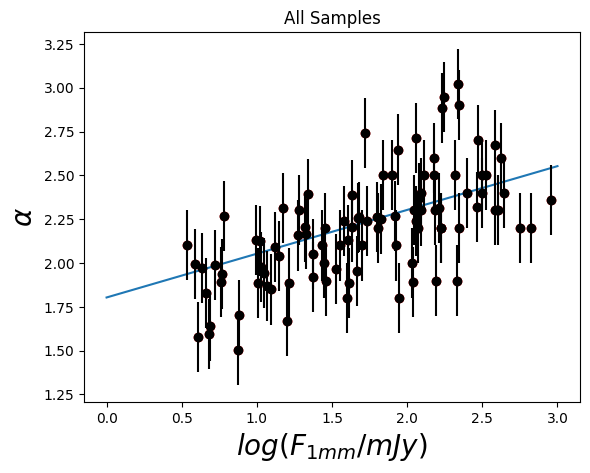

In [17]:
x = np.arange(0, 3.5)
plt.plot(total_sample_slope_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))] * x + total_sample_y_intercept_flux_alpha[chi_sum_all_sample.index(min(chi_sum_all_sample))])
plt.scatter(log_all_fluxes, all_spectral_indices, label='Upper Sco', color='red', zorder=1)
#plt.errorbar(log_all_fluxes, all_spectral_indices, yerr=[0.68*x for x in all_spectral_indices], fmt='o', color='red', zorder=1)
plt.errorbar(log_all_fluxes, all_spectral_indices, yerr=[0.2], fmt='o', color='black', zorder=2)
plt.xlabel('$log(F_{1mm}/mJy)$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.title('All Samples')

# Histograms

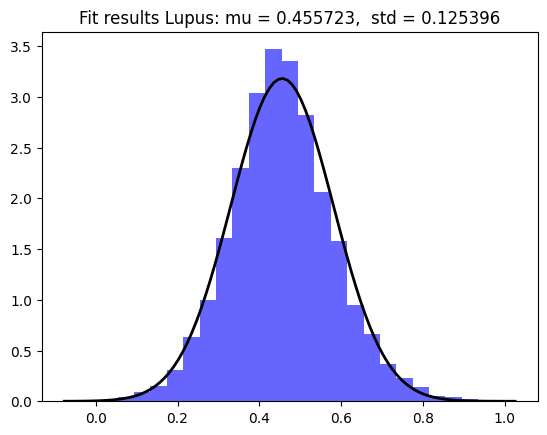

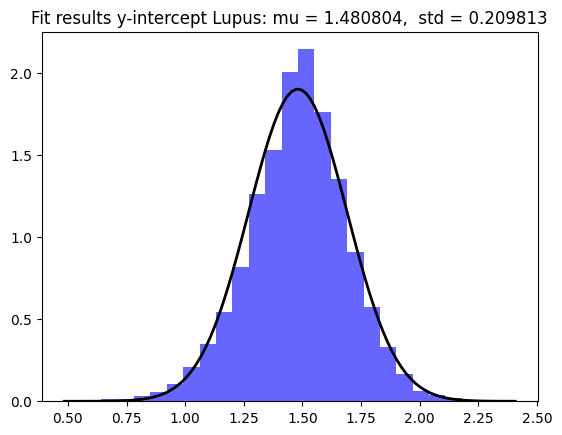

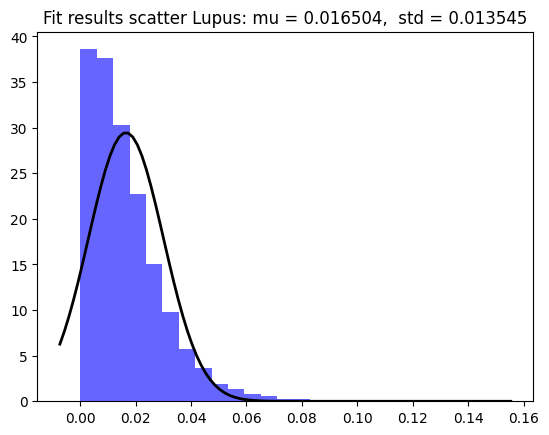

In [18]:
lupus_data.slope_mu, lupus_data.slope_std = norm.fit(lupus_slope_flux_alpha)
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results Lupus: mu = %.6f,  std = %.6f" % (lupus_data.slope_mu, lupus_data.slope_std)
plt.title(title)
plt.savefig("Fit Results Slope Lupus")
plt.show()

lupus_data.y_intercept_mu, lupus_data.y_intercept_std = norm.fit(lupus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Lupus: mu = %.6f,  std = %.6f" % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.title(title)
plt.savefig("Fit Results y-intercept Lupus")
plt.show()

lupus_scatter_mu, lupus_scatter_std = norm.fit(lupus_scatter)
# Plot the histogram.
plt.hist(lupus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_scatter_mu, lupus_scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Lupus: mu = %.6f,  std = %.6f" % (lupus_scatter_mu, lupus_scatter_std)
plt.title(title)
plt.savefig("Fit Results Scatter Lupus")
plt.show()

### Ophiucus

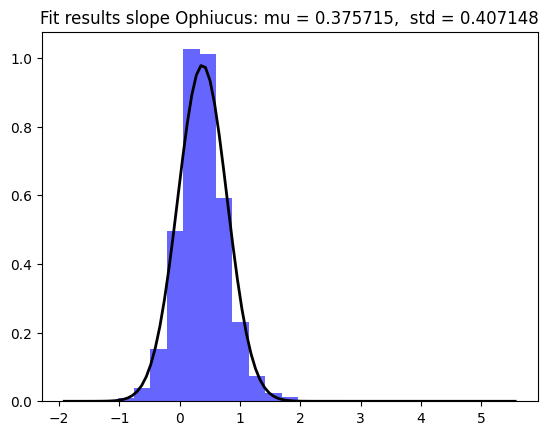

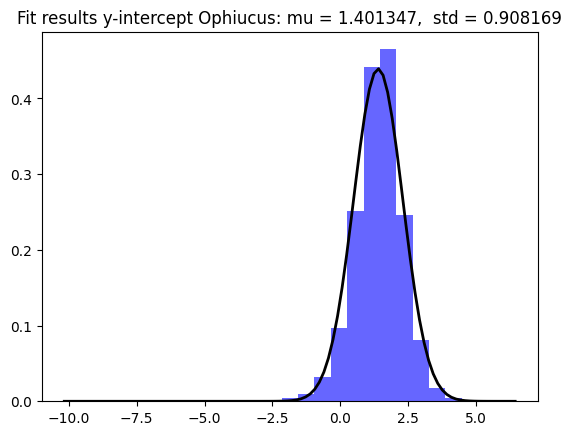

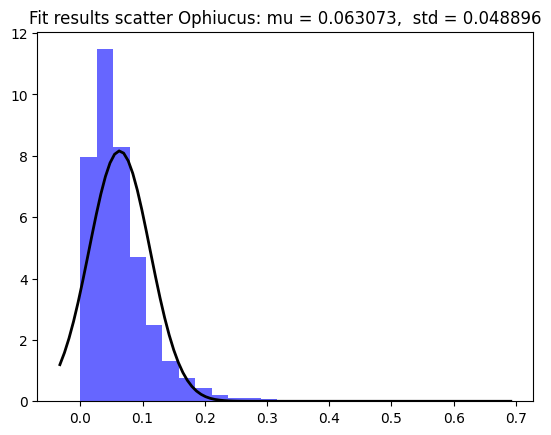

In [19]:
ophiucus_data.slope_mu, ophiucus_data.slope_std = norm.fit(ophiucus_slope_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.title(title)
plt.savefig("Fit Results slope Ophiucus")
plt.show()

ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std = norm.fit(ophiucus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.title(title)
plt.savefig("Fit Results y-intercept Ophiucus")
plt.show()

ophiucus_data.scatter_mu, ophiucus_data.scatter_std = norm.fit(ophiucus_scatter)
_std = norm.fit(ophiucus_scatter)
# Plot the histogram.
plt.hist(ophiucus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.title(title)
plt.savefig("Fit Results scatter Ophiucus")
plt.show()

### Taurus

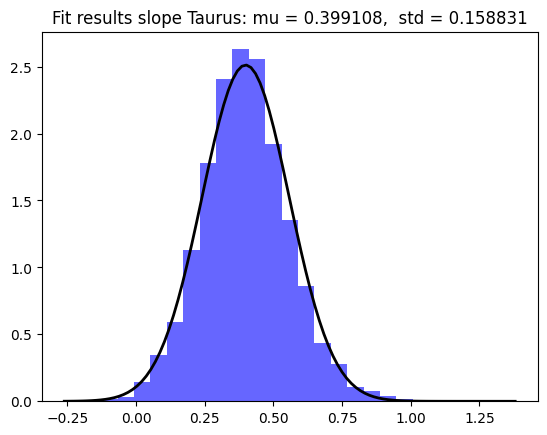

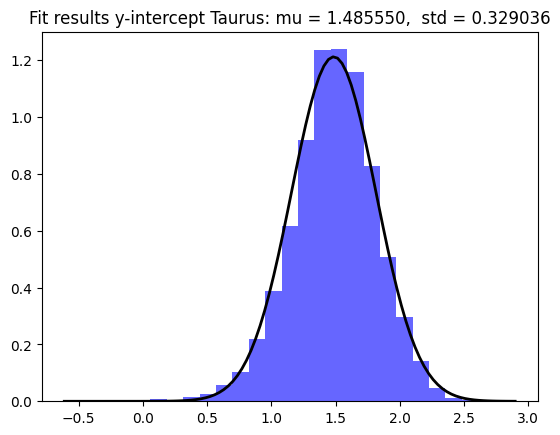

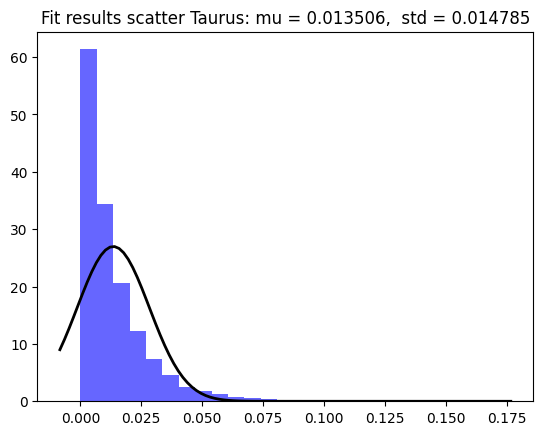

In [20]:
taurus_data.slope_mu, taurus_data.slope_std = norm.fit(taurus_slope_flux_alpha)
# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Taurus: mu = %.6f,  std = %.6f" % (taurus_data.slope_mu, taurus_data.slope_std)
plt.title(title)
plt.savefig("Fit Results slope Taurus")
plt.show()

taurus_data.y_intercept_mu, taurus_data.y_intercept_std = norm.fit(taurus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Taurus: mu = %.6f,  std = %.6f" % (taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.title(title)
plt.savefig("Fit Results y-intercept Taurus")
plt.show()

taurus_data.scatter_mu, taurus_data.scatter_std = norm.fit(taurus_scatter)
# Plot the histogram.
plt.hist(taurus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.scatter_mu, taurus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Taurus: mu = %.6f,  std = %.6f" % (taurus_data.scatter_mu, taurus_data.scatter_std)
plt.title(title)
plt.savefig("Fit Results scatter Taurus")
plt.show()

### Total Sample

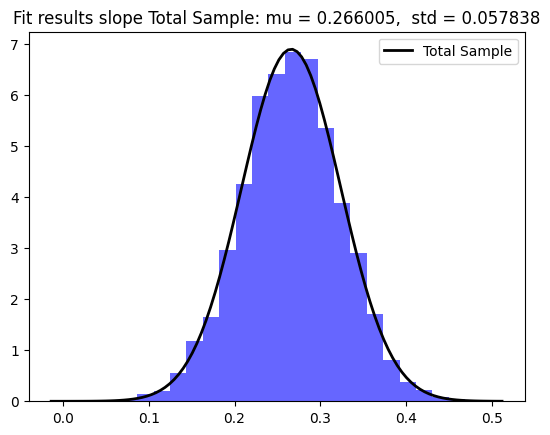

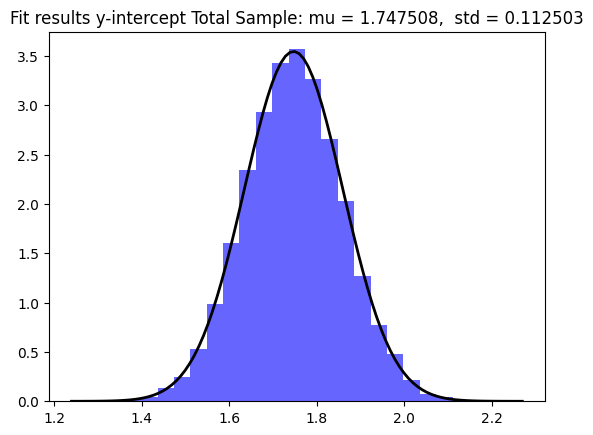

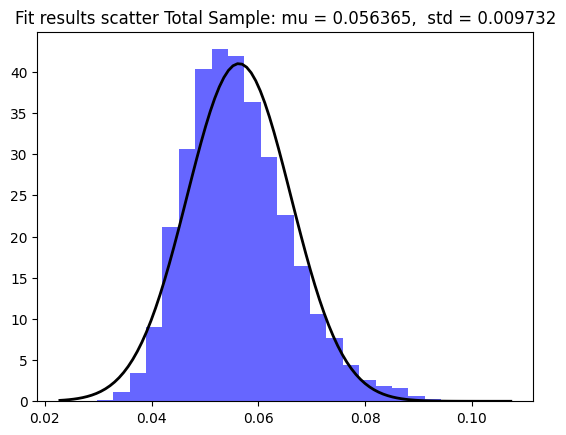

In [21]:
total_sample_data.slope_mu, total_sample_data.slope_std = norm.fit(total_sample_slope_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")
title = "Fit results slope Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.slope_mu, total_sample_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std = norm.fit(total_sample_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.title(title)
plt.show()

total_sample_data.scatter_mu, total_sample_data.scatter_std = norm.fit(scatter_total_sample)
# Plot the histogram.
plt.hist(scatter_total_sample, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.title(title)
plt.show()

### Upper-Sco

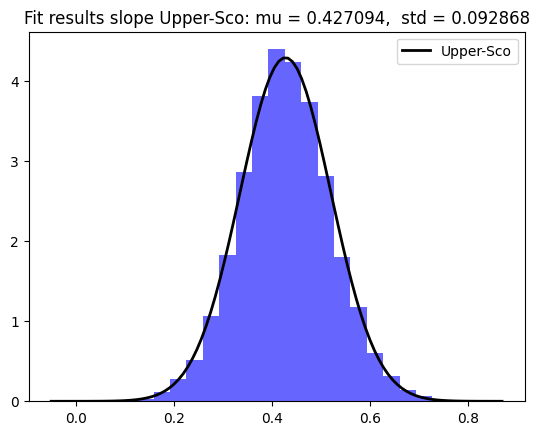

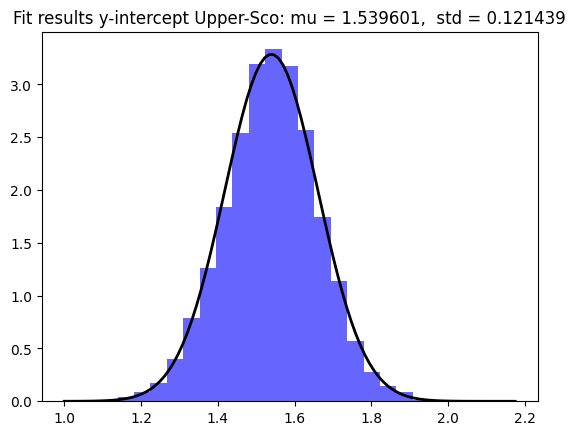

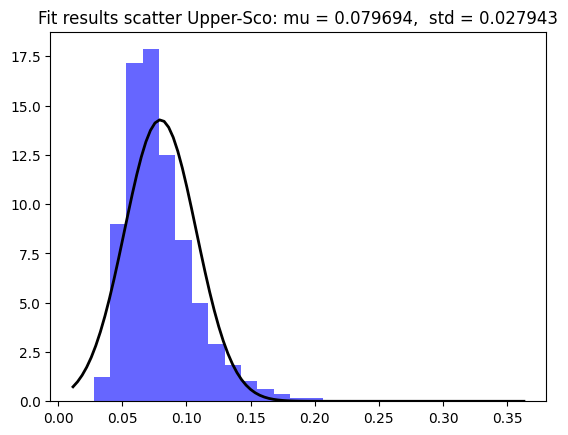

In [22]:
upper_sco_data.slope_mu, upper_sco_data.slope_std = norm.fit(upper_sco_slope_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco")
title = "Fit results slope Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std = norm.fit(upper_sco_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.title(title)
plt.show()

upper_sco_data.scatter_mu, upper_sco_data.scatter_std = norm.fit(scatter_upper_sco)
# Plot the histogram.
plt.hist(scatter_upper_sco, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.title(title)
plt.show()

In [23]:
print(u"Lupus slope mean: %.5f \u00B1 %.5f "
      "\nOphiucus slope mean: %.5f \u00B1 %.5f"
      "\nTaurus slope mean: %.5f \u00B1 %.5f"
      "\nTotal Sample slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco slope mean: %.5f \u00B1 %.5f"
      % (lupus_data.slope_mu, lupus_data.slope_std,
         ophiucus_data.slope_mu,ophiucus_data.slope_std,
         taurus_data.slope_mu, taurus_data.slope_std,
         total_sample_data.slope_mu, total_sample_data.slope_std,
         upper_sco_data.slope_mu, upper_sco_data.slope_std))

Lupus slope mean: 0.45572 ± 0.12540 
Ophiucus slope mean: 0.37572 ± 0.40715
Taurus slope mean: 0.39911 ± 0.15883
Total Sample slope mean: 0.26600 ± 0.05784
Upper-Sco slope mean: 0.42709 ± 0.09287


In [24]:
print(u"Lupus y-intercept mean: %.5f \u00B1 %.5f"
      "\nOphiucus y-intercept mean: %.5f \u00B1 %.5f"
      "\nTaurus y-intercept mean: %.5f\u00B1 %.5f"
      "\nTotal Sample y-intercept mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco y-intercept mean: %.5f \u00B1 %.5f"
      % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std,
         ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std,
         taurus_data.y_intercept_mu, taurus_data.y_intercept_std,
         total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
         upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std))

Lupus y-intercept mean: 1.48080 ± 0.20981
Ophiucus y-intercept mean: 1.40135 ± 0.90817
Taurus y-intercept mean: 1.48555± 0.32904
Total Sample y-intercept mean: 1.74751 ± 0.11250
Upper-Sco y-intercept mean: 1.53960 ± 0.12144


In [25]:
print(u"Lupus scatter mean: %.5f \u00B1 %.5f "
      "\nOphiucus scatter mean: %.5f \u00B1 %.5f"
      "\nTaurus scatter mean: %.5f \u00B1 %.5f"
      "\nTotal scatter slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco scatter mean: %.5f \u00B1 %.5f"
      % (lupus_scatter_mu, lupus_scatter_std,
         ophiucus_data.scatter_mu, ophiucus_data.scatter_std,
         taurus_data.scatter_mu, taurus_data.scatter_std,
         total_sample_data.scatter_mu, total_sample_data.scatter_std,
         upper_sco_data.scatter_mu, upper_sco_data.scatter_std))

Lupus scatter mean: 0.01650 ± 0.01355 
Ophiucus scatter mean: 0.06307 ± 0.04890
Taurus scatter mean: 0.01351 ± 0.01478
Total scatter slope mean: 0.05636 ± 0.00973
Upper-Sco scatter mean: 0.07969 ± 0.02794


In [26]:
from tabulate import tabulate
first_row = ["Region", "Slope", "Y-Intercept ", "Scatter"]
table = [["Upper-Sco", str(round(upper_sco_data.slope_mu, 4)) + r'$\pm$' + str(round(upper_sco_data.slope_std, 4)), str(round(upper_sco_data.y_intercept_mu, 4)) + '$\pm$' + str(round(upper_sco_data.y_intercept_std, 4)), str(round(upper_sco_data.scatter_mu, 4)) + r'$\pm$' + str(round(upper_sco_data.scatter_std, 4))],
         ["Lupus", str(round(lupus_data.slope_mu, 4)) + '$\pm$' + str(round(lupus_data.slope_std, 4)), str(round(lupus_data.y_intercept_mu, 4)) + '$\pm$' + str(round(lupus_data.y_intercept_std, 4)), str(round(lupus_scatter_mu, 4)) + '$\pm$' + str(round(lupus_scatter_std, 4))],
         ["Taurus", str(round(taurus_data.slope_mu, 4)) + '$\pm$' + str(round(taurus_data.slope_std, 4)), str(round(taurus_data.y_intercept_mu, 4)) + '$\pm$' + str(round(taurus_data.y_intercept_std, 4)), str(round(taurus_data.scatter_mu, 4)) + '$\pm$' + str(round(taurus_data.scatter_std, 4))],
         ["Ophiucus", str(round(ophiucus_data.slope_mu, 4)) + '$\pm$' + str(round(ophiucus_data.slope_std, 4)), str(round(ophiucus_data.y_intercept_mu, 4)) + '$\pm$' + str(round(ophiucus_data.y_intercept_std, 4)), str(round(ophiucus_data.scatter_mu, 4)) + '$\pm$' + str(round(ophiucus_data.scatter_std, 4))],
         ["Lupus + Taurus + Ophiucus", str(round(total_sample_data.slope_mu, 4)) + '$\pm$' + str(round(total_sample_data.slope_std, 4)), str(round(total_sample_data.y_intercept_mu, 4)) + '$\pm$' + str(round(total_sample_data.y_intercept_std, 4)), str(round(total_sample_data.scatter_mu, 4)) + '$\pm$' + str(round(total_sample_data.scatter_std, 4))]]
print(tabulate(table, headers = first_row))
with open("Table_6.txt", "w") as f:
    f.write(tabulate(table, headers = first_row))

Region                     Slope              Y-Intercept        Scatter
-------------------------  -----------------  -----------------  -----------------
Upper-Sco                  0.4271$\pm$0.0929  1.5396$\pm$0.1214  0.0797$\pm$0.0279
Lupus                      0.4557$\pm$0.1254  1.4808$\pm$0.2098  0.0165$\pm$0.0135
Taurus                     0.3991$\pm$0.1588  1.4856$\pm$0.329   0.0135$\pm$0.0148
Ophiucus                   0.3757$\pm$0.4071  1.4013$\pm$0.9082  0.0631$\pm$0.0489
Lupus + Taurus + Ophiucus  0.266$\pm$0.0578   1.7475$\pm$0.1125  0.0564$\pm$0.0097


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/1930988756.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/1930988756.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/1930988756.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/

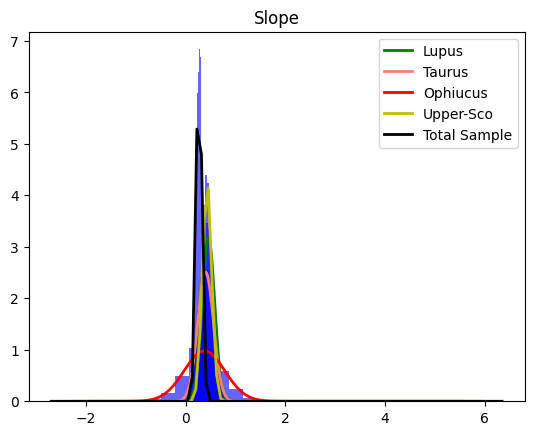

In [27]:
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")


# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")


# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")


plt.title("Slope")
plt.legend()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/2835114649.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/2835114649.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/2835114649.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_47710/

Text(0.5, 1.0, 'Y-Intercept')

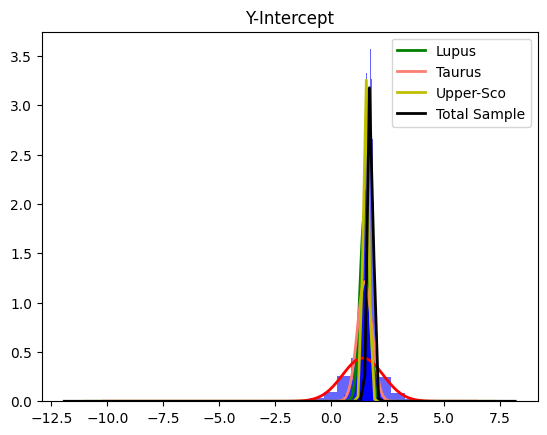

In [28]:
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")


# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, color="r")


# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")

plt.legend()
plt.title("Y-Intercept")

In [29]:
#ks test
# assume scatter = 0, calculate spectral_index for upper-sco from function of total sample
# repeat by changing alpha, beta and scatter
# using montecarlo simulation random values for alpha, beta and scatter will be taken
# note that while alpha and beta will be constant for each rune, scatter will not
# I have to randomly assign a spread for the scatter, for every run
# for every element calculated in every run, scatter will have to change and be withing the standard deviation

# the run ks 2 sample test on observed vs calculated and store the values

## Take random values from Gaussian

In [30]:
calculated_spectra_indices_upper_sco = []
calculated_spectra_indices_lupus = []

def spectral_index_function(alpha, beta, scatter, x):
    return alpha + beta * x - scatter

beta_list = []
alpha_list = []
def loop_spectra_index(slope_mu, slope_std, y_intercept_mu, y_intercept_std, scatter_mu, scatter_std, flux):
    beta = random.gauss(slope_mu, slope_std)
    beta_list.append(beta)
    alpha = random.gauss(y_intercept_mu, y_intercept_std)
    alpha_list.append(alpha)
    subset = []
    for x in range(len(flux)):
        new_scatter_std = random.gauss(scatter_mu, scatter_std)
        scatter = random.gauss(scatter_mu, scatter_mu - new_scatter_std)
        subset.append(spectral_index_function(alpha, beta, scatter, flux[x]))

    return subset

for i in range(1000):
    calculated_spectra_indices_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_flux_barenfeld_0_88mm_updated))

    calculated_spectra_indices_lupus.append(loop_spectra_index(lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std, log_flux_lupus_1_mm))

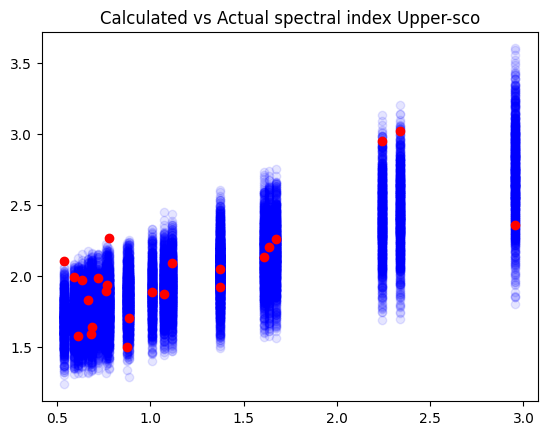

Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation:  0.2627059917278441


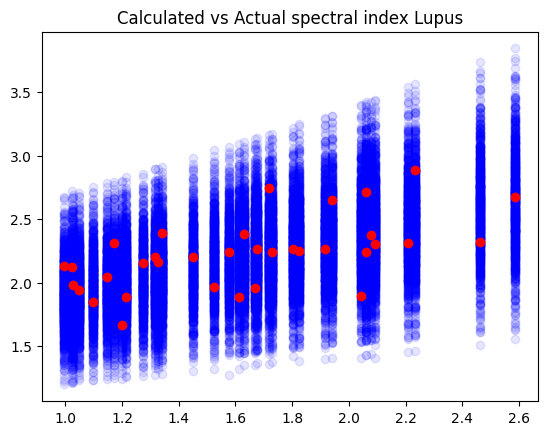

In [31]:
ks_2sample_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_upper_sco.append(ks_2samp(spectral_index_upper_sco, calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r', label='Measured Upper-Sco')
plt.title("Calculated vs Actual spectral index Upper-sco")
plt.savefig("calculated_vs_actual_spectral_index_upper_sco.png")
plt.show()
print("Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation: ", np.mean(ks_2sample_upper_sco))


for i in range(len(calculated_spectra_indices_lupus)):
    plt.scatter(log_flux_lupus_1_mm, calculated_spectra_indices_lupus[i], alpha=0.1, c="b", label="Calculated Lupus")

plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, c='r')
plt.title("Calculated vs Actual spectral index Lupus")
plt.show()

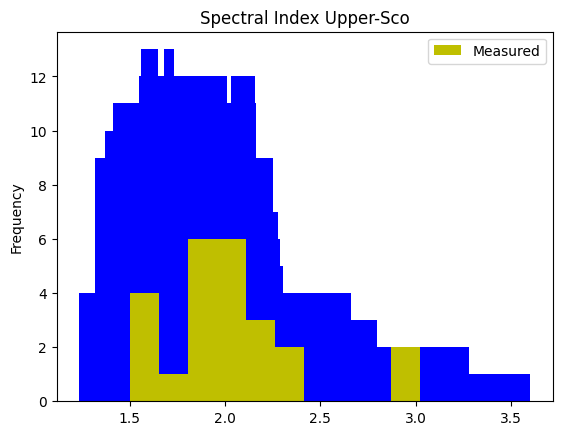

In [32]:
for i in range(len(calculated_spectra_indices_upper_sco)):
    mu_calculated, std_calculated = norm.fit(calculated_spectra_indices_upper_sco[i])

    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_calculated, std_calculated)
    plt.hist(calculated_spectra_indices_upper_sco[i], color='b')

plt.hist(spectral_index_upper_sco, color='y', label='Measured')

plt.title("Spectral Index Upper-Sco")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(33.972222222222214, 0.5, '$\\alpha$')

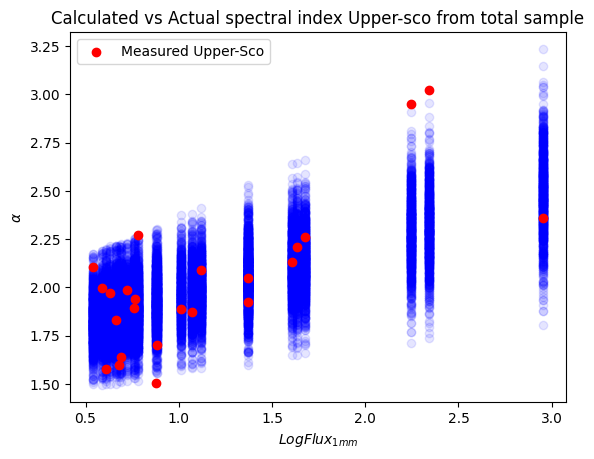

In [33]:
calculated_spectral_index_upper_sco_from_total_sample = []

for i in range(1000):
    calculated_spectral_index_upper_sco_from_total_sample.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std, log_flux_barenfeld_0_88mm_updated))

for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r', label='Measured Upper-Sco')
plt.legend()
plt.title("Calculated vs Actual spectral index Upper-sco from total sample")
plt.savefig("calculated_vs_actual_spectral_index_upper_sco_from_total_sample.png")
plt.xlabel("$Log Flux_{1mm}$")
plt.ylabel(r"$\alpha$")

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for total sample

In [34]:
matching_upper_sco_real_vs_from_total_sample = []
statistics_matching_upper_sco_real_vs_from_total_sample = []
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[1])
    statistics_matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[0])

print("Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation: ", np.mean(matching_upper_sco_real_vs_from_total_sample))

Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation:  0.21341691643450036


#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for upper-sco sample

In [35]:
print(np.mean(ks_2sample_upper_sco))

0.2627059917278441


In [36]:
print(np.mean(matching_upper_sco_real_vs_from_total_sample)/np.mean(ks_2sample_upper_sco))

0.8123793257657945


In [37]:
print(max(matching_upper_sco_real_vs_from_total_sample))
print(min(matching_upper_sco_real_vs_from_total_sample))

0.686017125117228
1.0619728627447544e-07


In [38]:
print(np.median(matching_upper_sco_real_vs_from_total_sample))
print(np.median(ks_2sample_upper_sco))

0.13982257948893737
0.13982257948893737


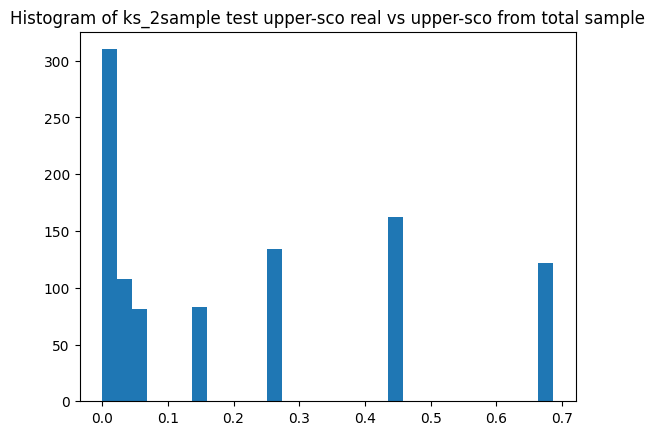

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.23399548, -0.13399548, -0.03399548,  0.06600452,  0.16600452,
         0.26600452,  0.36600452,  0.46600452,  0.56600452,  0.66600452,
         0.76600452]),
 <BarContainer object of 10 artists>)

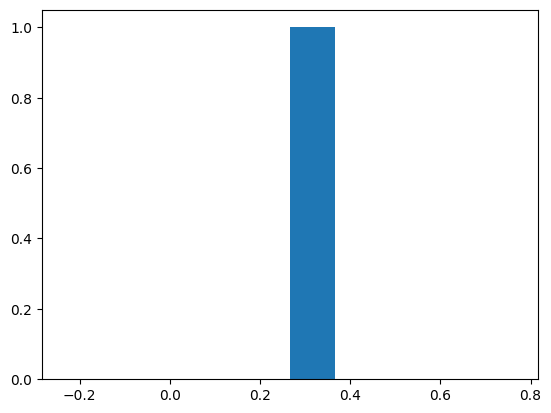

In [39]:
plt.hist(matching_upper_sco_real_vs_from_total_sample, bins=30)
plt.title('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.savefig('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.show()
plt.hist(total_sample_data.slope_mu)

In [40]:
less_than_2_5_spectral_index_upper_sco = []
less_than_2_5_flux_upper_sco = []
for i in spectral_index_upper_sco:
    if i <= 2.5:
        less_than_2_5_spectral_index_upper_sco.append(i)
        less_than_2_5_flux_upper_sco.append(log_flux_barenfeld_0_88mm_updated[spectral_index_upper_sco.index(i)])

In [41]:
less_than_2_5_index_upper_sco = region_data()

In [42]:
lm = linmix.LinMix(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, xsig[:len(less_than_2_5_flux_upper_sco)], ysig[:len(less_than_2_5_flux_upper_sco)], K=2)
lm.run_mcmc(silent=True)

less_than_2_5_index_upper_sco = region_data()

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_5_index_upper_sco.slope = []
less_than_2_5_index_upper_sco.y_intercept = []
less_than_2_5_index_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_5_index_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_5_index_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_5_index_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [43]:
less_than_2_5_index_calculated_spectra_indices_upper_sco = []
less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std = norm.fit(less_than_2_5_index_upper_sco.slope)
less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std = norm.fit(less_than_2_5_index_upper_sco.y_intercept)
less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std = norm.fit(less_than_2_5_index_upper_sco.scatter)

In [44]:
for i in range(1000):
    less_than_2_5_index_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std,
                                                                   less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std,
    less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std,
    less_than_2_5_flux_upper_sco))

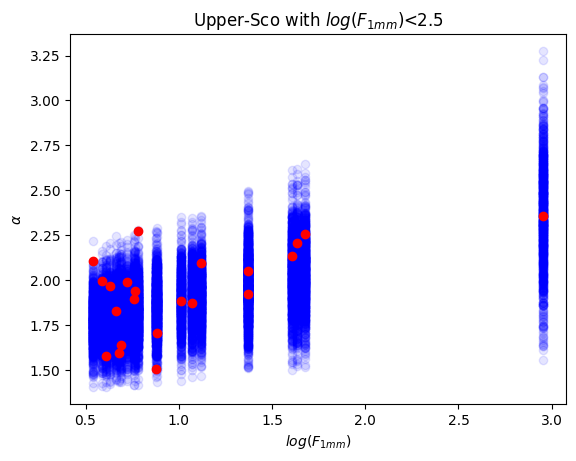

In [45]:
ks_2sample_less_than_2_5_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_5_upper_sco.append(ks_2samp(less_than_2_5_spectral_index_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i])[0])
    plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.title(r"Upper-Sco with $log(F_{1mm})$<2.5")
plt.ylabel(r'$\alpha$'), plt.xlabel('$log(F_{1mm})$')
plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, color='r')

In [46]:
np.mean(ks_2sample_less_than_2_5_upper_sco)

0.4425

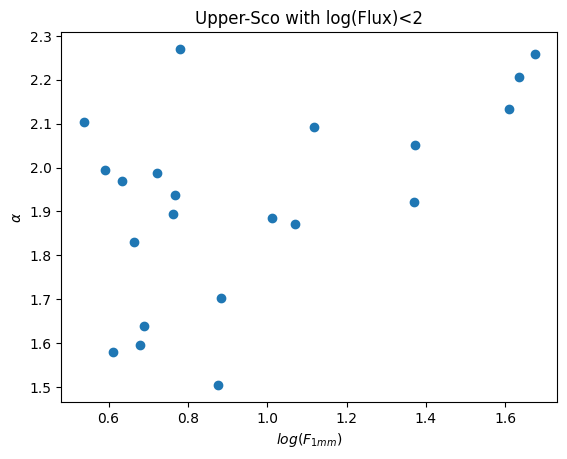

In [47]:
less_than_2_flux_upper_sco = region_data()
less_than_2_flux_upper_sco.index = []
less_than_2_flux_upper_sco.flux = []

for i in log_flux_barenfeld_0_88mm_updated:
    if i < 2.0:
        less_than_2_flux_upper_sco.flux.append(i)
        less_than_2_flux_upper_sco.index.append(spectral_index_upper_sco[log_flux_barenfeld_0_88mm_updated.index(i)])

plt.title("Upper-Sco with log(Flux)<2")
plt.ylabel(r'$\alpha$'), plt.xlabel('$log(F_{1mm})$')
plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index)


In [48]:
lm = linmix.LinMix(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, xsig[:len(less_than_2_flux_upper_sco.flux)], ysig[:len(less_than_2_flux_upper_sco.flux)], K=2)
lm.run_mcmc(silent=True)

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_flux_upper_sco.slope = []
less_than_2_flux_upper_sco.y_intercept = []
less_than_2_flux_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_flux_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_flux_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_flux_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [49]:
less_than_2_flux_calculated_spectra_indices_upper_sco = []
less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std = norm.fit(less_than_2_flux_upper_sco.slope)
less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std = norm.fit(less_than_2_flux_upper_sco.y_intercept)
less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std = norm.fit(less_than_2_flux_upper_sco.scatter)

In [50]:
for i in range(1000):
    less_than_2_flux_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std,
                                                                   less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std,
    less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std,
    less_than_2_flux_upper_sco.flux))

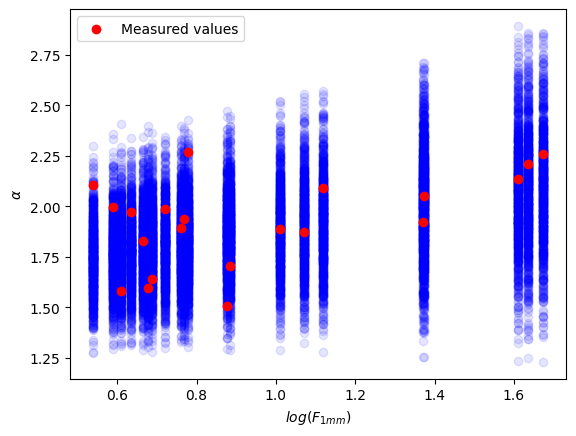

In [51]:
ks_2sample_less_than_2_flux_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_flux_upper_sco.append(ks_2samp(less_than_2_flux_upper_sco.index, less_than_2_flux_calculated_spectra_indices_upper_sco[i])[0])
    plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")


plt.ylabel(r'$\alpha$'), plt.xlabel('$log(F_{1mm})$')
plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, color='r', label='Measured values')
plt.legend()
plt.show()


In [52]:
print(np.mean(ks_2sample_less_than_2_flux_upper_sco))

0.4952857142857143


Create set of total-sample values from upper-sco measured values

In [53]:
alpha_total_sample_from_upper_sco = []
for i in range(1000):
    alpha_total_sample_from_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_total_fluxes))

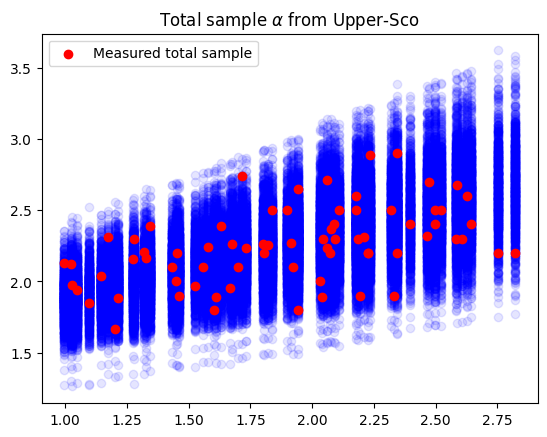

In [54]:
p_valueks_2sample_total_sample_from_upper_sco, ks_2sample_total_sample_from_upper_sco = [], []
for i in range(len(alpha_total_sample_from_upper_sco)):
    ks_2sample_total_sample_from_upper_sco.append(ks_2samp(alpha_total_sample_from_upper_sco[i], log_total_fluxes)[0])
    p_valueks_2sample_total_sample_from_upper_sco.append(ks_2samp(alpha_total_sample_from_upper_sco[i], log_total_fluxes)[1])
    plt.scatter(log_total_fluxes, alpha_total_sample_from_upper_sco[i], alpha=0.1, c="b")

plt.title(r'Total sample $\alpha$ from Upper-Sco')
plt.scatter(log_total_fluxes, total_spectra_indices, c='r', label='Measured total sample')
plt.legend()


0.4812054794520548
9.936541136224887e-05
0.4657534246575342


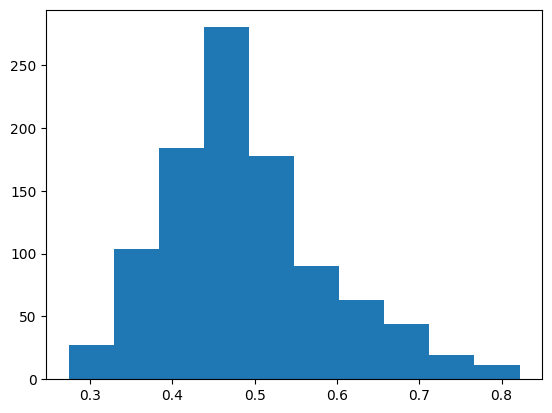

In [55]:
print(np.mean(ks_2sample_total_sample_from_upper_sco))
print(np.mean(p_valueks_2sample_total_sample_from_upper_sco))
plt.hist(ks_2sample_total_sample_from_upper_sco)
print(np.median(ks_2sample_total_sample_from_upper_sco))

In [56]:
calculated_alpha_total_sample_from_itself = []
for i in range(1000):
    calculated_alpha_total_sample_from_itself.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std,
    total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std,
    log_total_fluxes))

In [57]:
ks_2sample_calculated_total_sample_vs_measured = []
for i in range(1000):
    ks_2sample_calculated_total_sample_vs_measured.append(ks_2samp(calculated_alpha_total_sample_from_itself[i], total_spectra_indices)[1])

print(np.mean(ks_2sample_calculated_total_sample_vs_measured))

0.025073572840292335


In [58]:
print(np.mean(ks_2sample_total_sample_from_upper_sco)/np.mean(ks_2sample_calculated_total_sample_vs_measured))

19.19173954653861


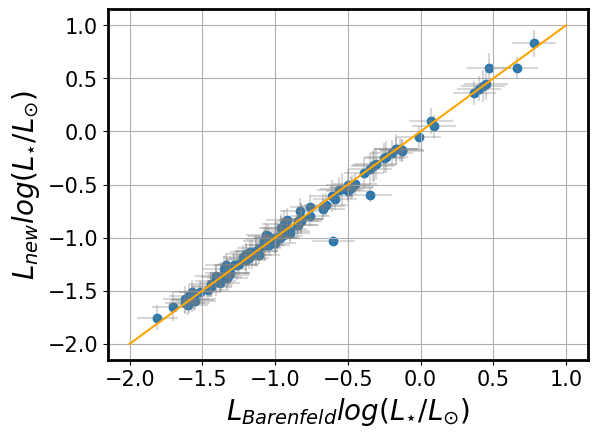

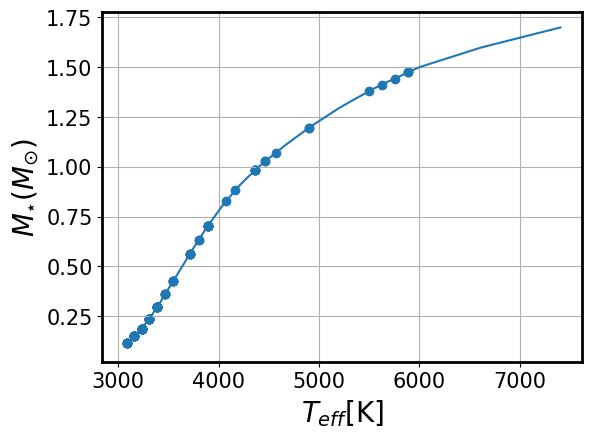

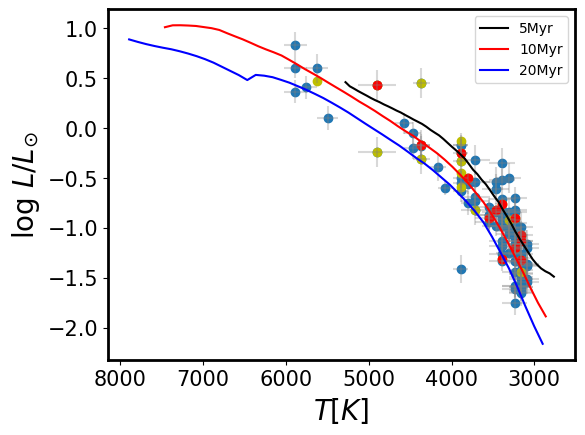

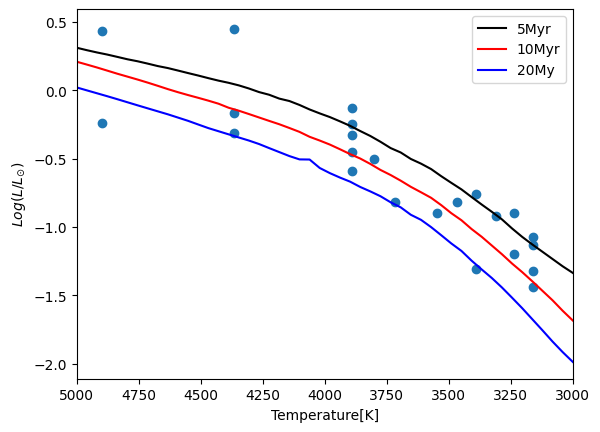

2.9487265841389996
2.3588885995561832
[1.8936752820133718, 1.9377739384931159, 2.9487265841389996, 1.9940617100648128, 2.104050274672768, 1.9885492826828755, 1.8853598363992103, 1.9690550822807236, 3.0214011127175606, 1.7036207539275081, 1.5785637388821967, 2.0921840951781787, 1.921694555107232, 2.2069906525876055, 2.258817833631177, 1.6389505318526834, 2.3588885995561832, 2.270253256160274, 1.5045161375846796, 1.595909812777543, 2.1330568846894087, 1.8706350322465939, 2.0501658967189953, 1.8300675071604586]
[-1.2, -1.31, 0.47, -1.13, -0.9, -0.82, -1.44, -0.17, -0.24, -0.9, -0.25, -0.92, -0.82, -0.59, -0.45, -0.76, 0.45, -0.5, -1.07, 0.43, -0.33, -0.13, -0.31, -1.32]
-0.24 4897.7881936844615


In [59]:
from data_file import temperature_list_barenfeld_updated, luminosity_list_barenfeld_updated
from HR_Diagram import f5, f10, f20
from Cumulative_spectral_indices import spectral_index_upper_sco
temperature_list_barenfeld_updated = [10 ** x for x in temperature_list_barenfeld_updated]
xmax, xmin = max(temperature_list_barenfeld_updated), min(temperature_list_barenfeld_updated)

#plot line 10Myr
x = np.linspace(np.min(3000), np.max(5000))
plt.plot(x, f5(x), c='k', label='5Myr')
plt.plot(x, f10(x), c='red', label='10Myr')
plt.plot(x, f20(x), c='b', label='20My')

plt.scatter(temperature_list_barenfeld_updated, luminosity_list_barenfeld_updated)
plt.xlim(5000, 3000)
plt.ylabel('$Log(L/L_{\odot})$'), plt.xlabel('Temperature[K]')
plt.legend()
plt.show()
print(spectral_index_upper_sco[luminosity_list_barenfeld_updated.index(max(luminosity_list_barenfeld_updated))])
print(spectral_index_upper_sco[luminosity_list_barenfeld_updated.index(0.45)])
print(spectral_index_upper_sco)
print(luminosity_list_barenfeld_updated)
print(luminosity_list_barenfeld_updated[spectral_index_upper_sco.index(3.0214011127175606)], temperature_list_barenfeld_updated[spectral_index_upper_sco.index(3.0214011127175606)])

In [60]:
print(ks_2samp(spectral_index_upper_sco, spectral_indices_taurus))

KstestResult(statistic=0.5357142857142857, pvalue=0.0017269211993544886)


In [61]:
from scipy.stats import anderson
print(anderson(spectral_index_upper_sco, dist='norm'))

AndersonResult(statistic=0.8345784281164939, critical_values=array([0.513, 0.584, 0.701, 0.817, 0.972]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [62]:
all_spectral_indices = spectral_indices_taurus + spectral_index_upper_sco + spectral_index_ophiucus + tazzari_lupus_spectral_indices
print(anderson(all_spectral_indices, dist='norm'))

AndersonResult(statistic=0.4804724781317731, critical_values=array([0.555, 0.632, 0.758, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [63]:
from scipy.stats import shapiro
print(shapiro(all_spectral_indices))

ShapiroResult(statistic=0.9843900799751282, pvalue=0.30653923749923706)


In [64]:
from scipy.stats import anderson_ksamp
print(anderson_ksamp([spectral_index_upper_sco, spectral_indices_taurus, spectral_index_ophiucus, tazzari_lupus_spectral_indices]))

Anderson_ksampResult(statistic=4.501273446132445, critical_values=array([0.49854918, 1.3236709 , 1.91577682, 2.49304213, 3.24593219,
       3.82285604, 5.12078789]), significance_level=0.0021665648773763124)


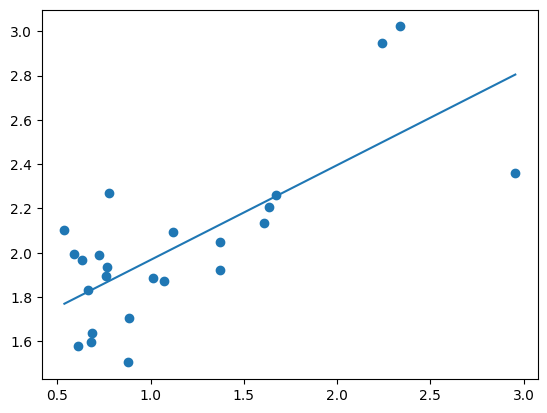

0.4278533267216873
0.4278533267216873


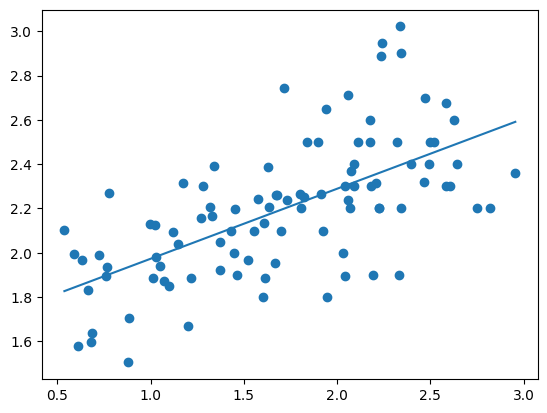

In [65]:
# Importing the necessary libraries
from scipy.stats import linregress

# Combining the log fluxes from different sources
log_all_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_barenfeld_0_88mm_updated + log_flux_list_ophiucus_ricci_1mm + log_flux_lupus_1_mm

# Combining the spectral indices from different sources
all_spectral_indices = spectral_indices_taurus + spectral_index_upper_sco + spectral_index_ophiucus + tazzari_lupus_spectral_indices

# Performing linear regression on the fluxes and spectral indices of Upper Scorpius
slope, intercept, r, p, std_err = linregress(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco)

# Defining a function that returns the values of y for a given set of x values, based on the slope and intercept values from the regression
def myfunc(x):
  return slope * x + intercept

# Creating a set of x values to plot the regression line
x = np.linspace(min(log_all_fluxes), max(log_all_fluxes))

# Creating a set of y values for the regression line using the defined function and the x values
mymodel_upper_sco = list(map(myfunc, x))

# Plotting the data points and the regression line for Upper Scorpius
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco)
plt.plot(x, mymodel_upper_sco)
plt.show()

# Printing the slope value for Upper Scorpius
print(slope)

# Performing linear regression on all the combined fluxes and spectral indices
slope_all, intercept_all, r_all, p_all, std_err_all = linregress(log_all_fluxes, all_spectral_indices)

# Defining a function that returns the values of y for a given set of x values, based on the slope and intercept values from the regression
def myfunc(x):
  return slope_all * x + intercept_all

# Creating a set of y values for the regression line using the defined function and the x values
mymodel_all = list(map(myfunc, x))

# Plotting the data points and the regression line for all the sources
plt.scatter(log_all_fluxes, all_spectral_indices)
plt.plot(x, mymodel_all)

# Printing the slope value for all the sources
print(slope)


## Rotate the points

In [66]:
import numpy as np

def rotate(points, theta):
    """Rotate a set of 2D points by an angle `theta`."""
    # Convert theta to radians
    theta = np.radians(theta)

    # Create the rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])

    # Apply the rotation matrix to the points
    rotated_points = np.dot(R, points.T).T

    return rotated_points

import math
theta_upper_sco = math.degrees(math.atan(slope))
rotated_points_upper_sco = rotate(np.array([log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco]).T, -theta_upper_sco)

Text(0.5, 1.0, 'Upper-Sco original and rotated')

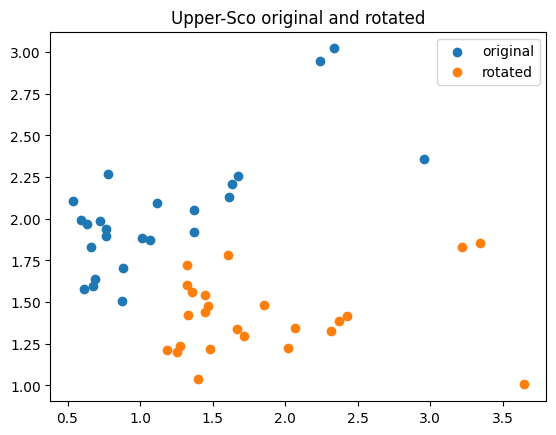

In [67]:
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='original')
plt.scatter(rotated_points_upper_sco[:,0], rotated_points_upper_sco[:,1], label='rotated')
plt.legend()
plt.title('Upper-Sco original and rotated')

In [68]:
print(shapiro(rotated_points_upper_sco[:,1]))
print(shapiro(all_spectral_indices))

ShapiroResult(statistic=0.9656581878662109, pvalue=0.5619866847991943)
ShapiroResult(statistic=0.9843900799751282, pvalue=0.30653923749923706)


ShapiroResult(statistic=0.9843845367431641, pvalue=0.3062634766101837)
ShapiroResult(statistic=0.9843900799751282, pvalue=0.30653923749923706)
Anderson test rotated:  AndersonResult(statistic=0.3595300065618261, critical_values=array([0.555, 0.632, 0.758, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test original:  AndersonResult(statistic=0.4804724781317731, critical_values=array([0.555, 0.632, 0.758, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
0.03817578118471595


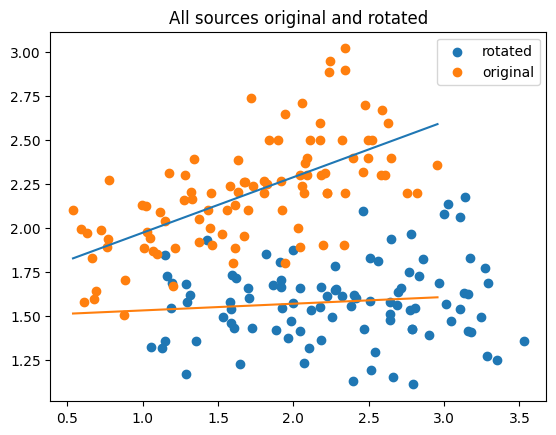

In [69]:
theta_all = math.degrees(math.atan(slope_all))  # calculate the angle of rotation from the slope of the linear regression line
all_rotated_points = rotate(np.array([log_all_fluxes, all_spectral_indices]).T, -theta_all)  # apply rotation to the data points using the calculated angle
plt.scatter(all_rotated_points[:,0], all_rotated_points[:,1], label='rotated')  # plot the rotated data points
print(shapiro(all_rotated_points[:,1]))  # perform Shapiro-Wilk normality test on the y-coordinates of the rotated data points and print the result
print(shapiro(all_spectral_indices))  # perform Shapiro-Wilk normality test on the original y-coordinates of the data points and print the result
plt.scatter(log_all_fluxes, all_spectral_indices, label='original')  # plot the original data points
plt.legend()  # add legend to the plot
print("Anderson test rotated: ", anderson(all_rotated_points[:,1]))  # perform Anderson-Darling normality test on the y-coordinates of the rotated data points and print the result
print("Anderson test original: ", anderson(all_spectral_indices))  # perform Anderson-Darling normality test on the original y-coordinates of the data points and print the result
plt.title('All sources original and rotated')  # add title to the plot
plt.plot(x, mymodel_all)  # plot the linear regression line on the original data points

slope_all_rotated, intercept_all_rotated, r_all_rotated, p_all_rotated, std_err_all_rotated = linregress(all_rotated_points[:,0], all_rotated_points[:,1])  # perform linear regression on the rotated data points and store the results

def myfunc(x):
  return slope_all_rotated * x + intercept_all_rotated  # define a function that returns the y-coordinates of the linear regression line for a given x-coordinate

mymodel_all_rotated = list(map(myfunc, x))  # apply the defined function to all x-coordinates to get the corresponding y-coordinates of the linear regression line on the rotated data points
plt.plot(x, mymodel_all_rotated)  # plot the linear regression line on the rotated data points
plt.savefig('all_sources_rotated.png')  # save the plot as a PNG file
print(slope_all_rotated)  # print the slope of the linear regression line on the rotated data points


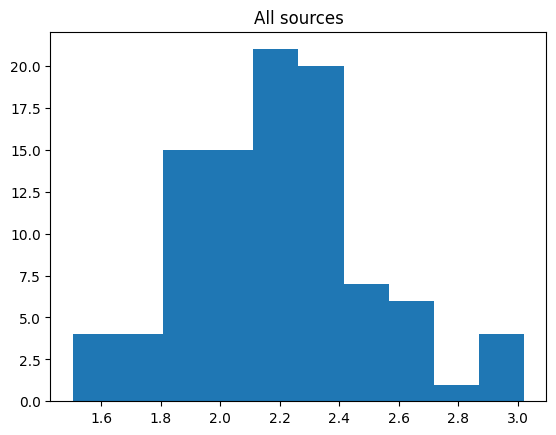

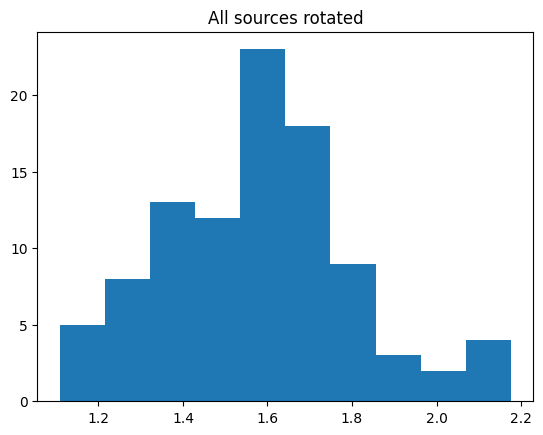

In [70]:
plt.hist(all_spectral_indices)
plt.title('All sources')
plt.show()
plt.hist(all_rotated_points[:,1])
plt.title('All sources rotated')
plt.show()

In [71]:
from tabulate import tabulate
print(tabulate([['Upper-Sco', slope, intercept, r, p, std_err], ['All sources', slope_all, intercept_all, r_all, p_all, std_err_all], ['All sources rotated', slope_all_rotated, intercept_all_rotated, r_all_rotated, p_all_rotated, std_err_all_rotated]], headers=['Source', 'Slope', 'Intercept', 'R', 'P', 'Std_err']))

Source                   Slope    Intercept         R            P    Std_err
-------------------  ---------  -----------  --------  -----------  ---------
Upper-Sco            0.427853       1.53963  0.73835   3.80123e-05  0.0833203
All sources          0.316034       1.65673  0.634876  2.87937e-12  0.0394589
All sources rotated  0.0381758      1.49219  0.10984   0.284161     0.0354429


#### Lilliéfors test (two-tailed test)

In [72]:
from statsmodels.stats.diagnostic import lilliefors
print(lilliefors(all_spectral_indices))
print(lilliefors(all_rotated_points[:,1]))

(0.07560186736476215, 0.20718670005183507)
(0.06897574895141134, 0.32842537757329593)


In [73]:
from scipy.stats import normaltest as agostino
print(agostino(all_rotated_points[:,1]))
print(agostino(all_spectral_indices))

NormaltestResult(statistic=2.059590056780902, pvalue=0.3570801443605191)
NormaltestResult(statistic=1.9181549026131988, pvalue=0.3832462862962181)


In [74]:
from scipy.stats import ttest_ind as ttest
ttest_mean_p_value = []
for i in range(1000):
    ttest_mean_p_value.append(ttest(spectral_index_upper_sco, calculated_spectral_index_upper_sco_from_total_sample[i]))

print(np.mean(ttest_mean_p_value))

0.4025729255657136


## Rotate points with lowest chi squared slope

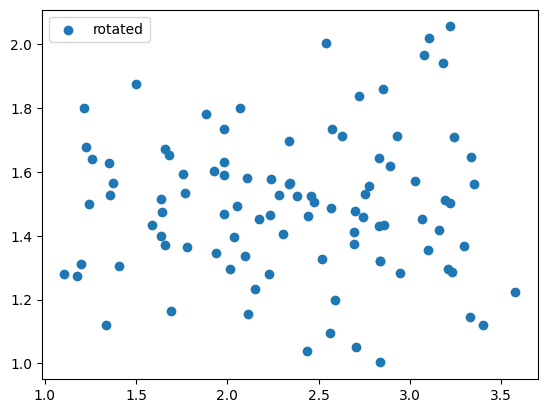

In [75]:
lowest_chi_theta_all = math.degrees(math.atan(0.3580257786120977))
lowest_chi_all_rotated_points = rotate(np.array([log_all_fluxes, all_spectral_indices]).T, -lowest_chi_theta_all)
plt.scatter(lowest_chi_all_rotated_points[:,0], lowest_chi_all_rotated_points[:,1], label='rotated')
plt.legend()

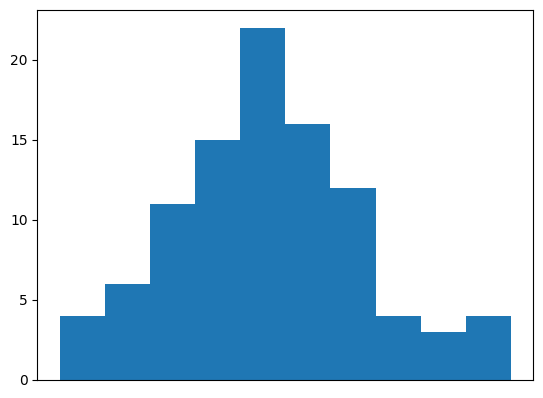

In [76]:
plt.hist(lowest_chi_all_rotated_points[:,1])
frame = plt.gca()
frame.xaxis.set_visible(False)
plt.savefig('lowest_chi_all_rotated_points.png')

In [77]:
# Check normality of distribution using different statistical tests
# Shapiro-Wilk test for normality
print(shapiro(lowest_chi_all_rotated_points[:,1]))
# Anderson-Darling test for normality
print(anderson(lowest_chi_all_rotated_points[:,1]))
# Agostino test for normality
print(agostino(lowest_chi_all_rotated_points[:,1]))
# Lilliefors test for normality
print(lilliefors(lowest_chi_all_rotated_points[:,1]))

# Get minimum chi-squared value from all samples
print(min(chi_sum_all_sample))

# Create a table with p-values for different normality tests
table_p_values_normality_tests = tabulate([['All sources', shapiro(all_spectral_indices)[1], anderson(all_spectral_indices)[0], agostino(all_spectral_indices)[1], lilliefors(all_spectral_indices)[1]], ['All sources rotated', shapiro(all_rotated_points[:,1])[1], anderson(all_rotated_points[:,1])[0], agostino(all_rotated_points[:,1])[1], lilliefors(all_rotated_points[:,1])[1]], ['All sources lowest chi', shapiro(lowest_chi_all_rotated_points[:,1])[1], anderson(lowest_chi_all_rotated_points[:,1])[0], agostino(lowest_chi_all_rotated_points[:,1])[1], lilliefors(lowest_chi_all_rotated_points[:,1])[1]]], headers=['Source', 'Shapiro', 'Anderson', 'Agostino', 'Lilliefors'])

# Print the table of p-values for normality tests
print(table_p_values_normality_tests)


ShapiroResult(statistic=0.9886940717697144, pvalue=0.582669198513031)
AndersonResult(statistic=0.2518485400239854, critical_values=array([0.555, 0.632, 0.758, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
NormaltestResult(statistic=0.9694263685615743, pvalue=0.6158738137256421)
(0.04848649590338605, 0.841022350463352)
50.39732298289097
Source                    Shapiro    Anderson    Agostino    Lilliefors
----------------------  ---------  ----------  ----------  ------------
All sources              0.306539    0.480472    0.383246      0.207187
All sources rotated      0.306263    0.35953     0.35708       0.328425
All sources lowest chi   0.582669    0.251849    0.615874      0.841022


In [78]:
import pandas as pd
normality_tests_table = pd.DataFrame(list(zip(['All sources', 'All sources rotated', 'All sources lowest chi'], [shapiro(all_spectral_indices)[1], shapiro(all_rotated_points[:,1])[1], shapiro(lowest_chi_all_rotated_points[:,1])[1]], [anderson(all_spectral_indices)[0], anderson(all_rotated_points[:,1])[0], anderson(lowest_chi_all_rotated_points[:,1])[0]], [agostino(all_spectral_indices)[1], agostino(all_rotated_points[:,1])[1], agostino(lowest_chi_all_rotated_points[:,1])[1]], [lilliefors(all_spectral_indices)[1], lilliefors(all_rotated_points[:,1])[1], lilliefors(lowest_chi_all_rotated_points[:,1])[1]])), columns=['Source', 'Shapiro', 'Anderson', 'Agostino', 'Lilliefors'])